In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import KNNImputer
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn import tree
import matplotlib.pyplot as plt

In [2]:
# Load dataset
df = pd.read_csv('/content/Final_Cleaned.csv')

#imputer = SimpleImputer(strategy='mean', missing_values=np.nan)
#df[['Vit D', 'Calcium']] = imputer.fit_transform(df[['Vit D', 'Calcium']])

#imputer = SimpleImputer(strategy='median', missing_values=np.nan)
#df[['Vit D', 'Calcium']] = imputer.fit_transform(df[['Vit D', 'Calcium']])

# Imputation - KNN
knn_imputer = KNNImputer(n_neighbors=5)
df[['Vit D', 'Calcium']] = knn_imputer.fit_transform(df[['Vit D', 'Calcium']])

# One-hot encode categorical features
data = pd.get_dummies(df, columns=['Gender', 'DM', 'HTN', 'Menopause'])

In [3]:
X = data.drop(['ID', 'Diagnosis'], axis=1)
y = data['Diagnosis']

# Convert target to numerical
y = y.map({'Normal': 0, 'Penia': 1, 'Porosis': 2})

# Initialize the Decision Tree Classifier
clf_dt = DecisionTreeClassifier(random_state=42, max_depth=4)

# Perform cross-validation for Decision Tree
cv_scores_dt = cross_val_score(clf_dt, X, y, cv=5, scoring='accuracy')
cv_auc_dt = cross_val_score(clf_dt, X, y, cv=5, scoring='roc_auc_ovr')

print("Cross-validation accuracy scores for Decision Tree:", cv_scores_dt)
print("Mean cross-validation accuracy for Decision Tree:", np.mean(cv_scores_dt))
print("Cross-validation AUC scores for Decision Tree:", cv_auc_dt)
print("Mean cross-validation AUC for Decision Tree:", np.mean(cv_auc_dt))

# Train the model on the entire dataset
clf_dt.fit(X, y)

# Predict probabilities for the entire dataset
y_pred_prob = clf_dt.predict_proba(X)

# Binarize the output labels for ROC calculation
y_bin = label_binarize(y, classes=[0, 1, 2])

Cross-validation accuracy scores for Decision Tree: [0.57317073 0.46341463 0.7195122  0.68292683 0.58024691]
Mean cross-validation accuracy for Decision Tree: 0.6038542607648298
Cross-validation AUC scores for Decision Tree: [0.79103437 0.64488823 0.83379656 0.85175167 0.69781488]
Mean cross-validation AUC for Decision Tree: 0.7638571425218702


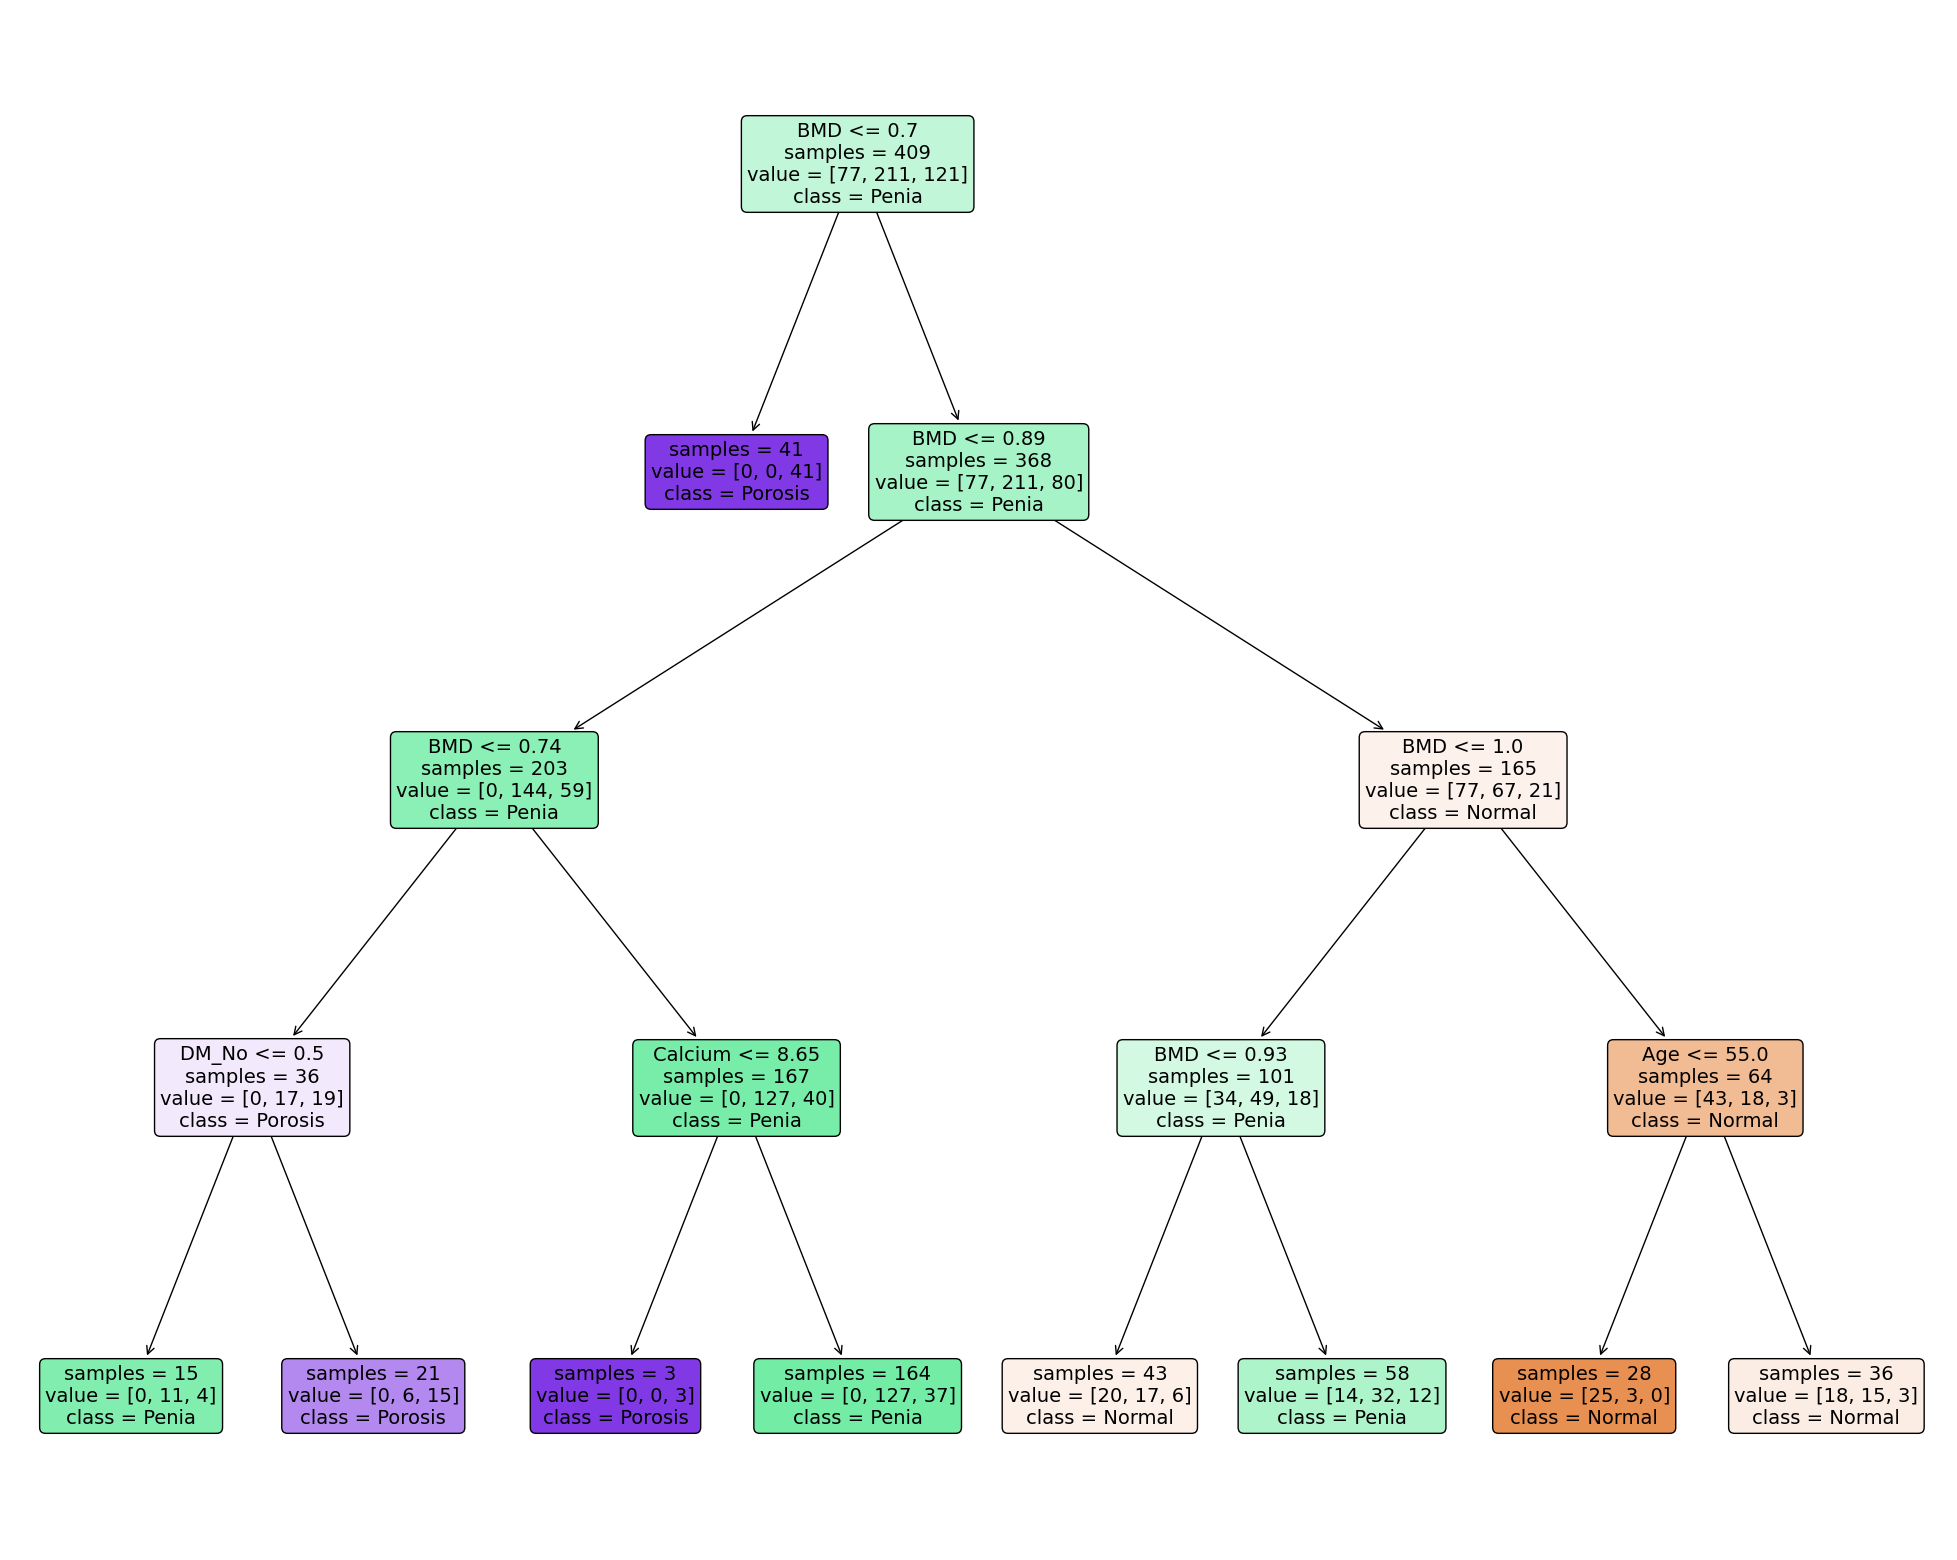

In [4]:

# Plot Decision Tree
fig = plt.figure(figsize=(25, 20))
_ = tree.plot_tree(clf_dt,
                   feature_names=X.columns,
                   class_names=['Normal', 'Penia', 'Porosis'],
                   filled=True,
                   fontsize=14,
                   rounded=True,
                   proportion=False,
                   precision=2,
                   label='all',
                   impurity=False)
plt.show()

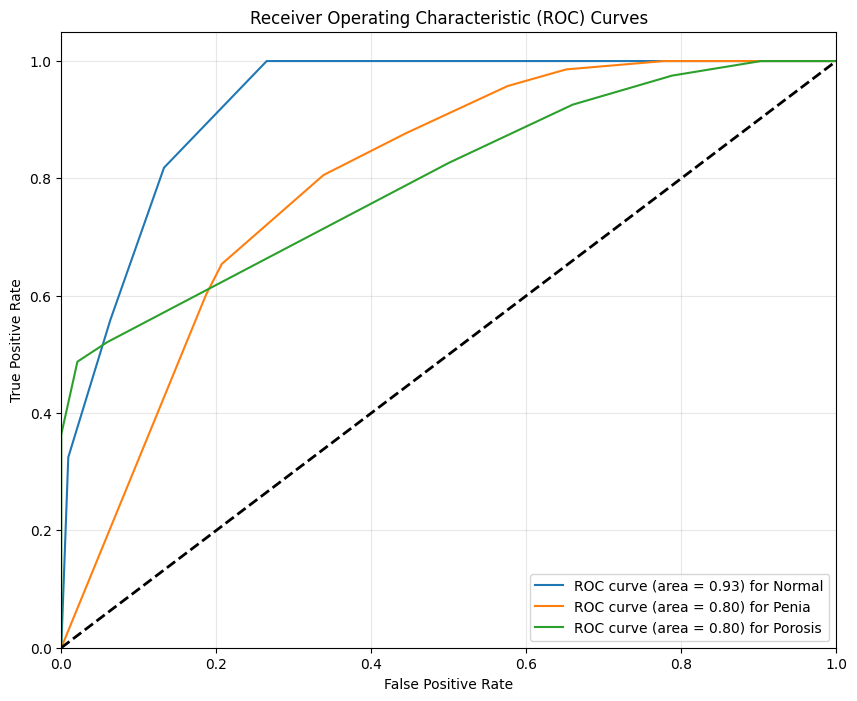

In [5]:
# Calculate ROC AUC for each class
auc_scores = {}
for i, class_name in enumerate(['Normal', 'Penia', 'Porosis']):
    auc_scores[class_name] = roc_auc_score(y_bin[:, i], y_pred_prob[:, i])

# Plot ROC curves for each class
plt.figure(figsize=(10, 8))
for i, class_name in enumerate(['Normal', 'Penia', 'Porosis']):
    fpr, tpr, _ = roc_curve(y_bin[:, i], y_pred_prob[:, i])
    plt.plot(fpr, tpr, label=f'ROC curve (area = {auc_scores[class_name]:.2f}) for {class_name}')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()
